In [168]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return np.log(odds)

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

sigmoid_func(logit_func(odds_set[0]))

0.83333333333333337

In [185]:
import autograd.numpy as anp
from autograd import grad
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [186]:
def sigmoid(x):
    return 0.5*(anp.tanh(x) + 1)

In [187]:
def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(anp.dot(inputs, weights))

In [172]:
def training_loss(weights, inputs):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -anp.sum(anp.log(label_probabilities))

In [201]:
# Mess with this!
inputs = anp.array([[0.52, 1.12],
                   [0.88, -1.08],
                   [0.52, 0.06],
                   [0.3, -2.49],
                   [0.4, -1],
                   [0.4, 0.4]
                  ])
targets = anp.array([True, True, True, False, False, False])

# Build a function that returns gradients of training loss using autograd.
training_gradient_fun = grad(training_loss)

# Check the gradients numerically, just to be safe.
weights = anp.array([0.0, 0.0])

# Optimize weights using gradient descent.
print("Initial loss:", training_loss(weights, inputs))

for i in range(6000):
    weights -= training_gradient_fun(weights, inputs) * 0.01

print("Trained loss:", training_loss(weights, inputs))

('Initial loss:', 4.1588830833596715)
('Trained loss:', 2.9862441377687992)


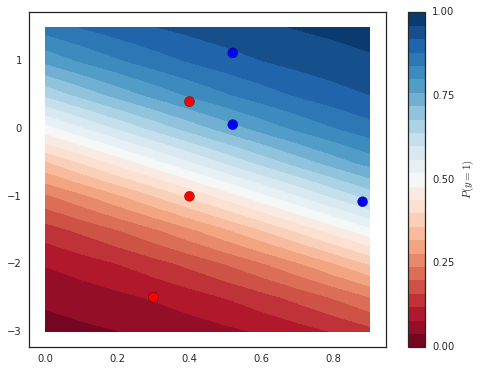

In [202]:
xx, yy = numpy.mgrid[0:1:.1, -3:2:.5]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = map(lambda x: logistic_predictions(weights, x), grid)
probs = np.array(probs).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(*zip(*inputs), c=['b' if c else 'r' for c in targets], s=100, alpha=1)
# ax.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=.8)
# ax.plot()

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [208]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])

In [209]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

[(-5, 5),
 (-5, 5),
 None]

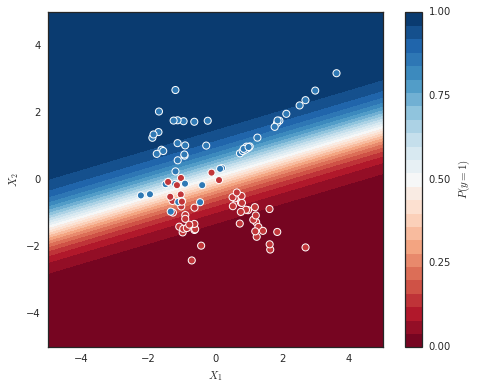

In [210]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")